In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import praw
import os
import configobj

In [3]:
config = configobj.ConfigObj('.env')
client_id = config['REDDIT_CLIENT_ID']
# client_id = os.getenv('REDDIT_CLIENT_ID')
client_secret = config['REDDIT_CLIENT_SECRET']
user_agent = 'Testing_api'
username = config['REDDIT_USERNAME']
password = config['REDDIT_PASSWORD']

KeyError: 'REDDIT_CLIENT_ID'

In [35]:
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    password=password,
    user_agent=user_agent,
    username=username,
)

In [36]:
subreddit = reddit.subreddit('datascience')

In [37]:
# for submission in subreddit.hot(limit=10):
#     print(f"Title: {submission.title}")
#     print(f"Score: {submission.score}")
#     print(f"URL: {submission.url}")

In [40]:
post_id = 'gvR0m56MEP'
submission = reddit.submission(url="https://www.reddit.com/r/datascience/comments/xab1d9/stock_market_online_dataset/")
print(submission)

xab1d9


In [43]:
# print(f"Title: {submission.title}")
# print(f"Author: {submission.author}")
# print(f"Score: {submission.score}")
# print(f"URL: {submission.url}")
# print(f"Number of Comments: {submission.num_comments}")
# print(f"Post Text: {submission.selftext}")
# print(f"Created At: {submission.created_utc}")
# print("-" * 50)

# If you want to scrape the comments as well:
# submission.comments.replace_more(limit=5)  # Replaces 'load more comments' button
for top_level_comment in submission.comments:
    print(top_level_comment.body)
    break

You can use [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) to pull stock data from yahoo finance


In [42]:
#Now, we will execute the link we got further

In [44]:
response = requests.get('https://pandas-datareader.readthedocs.io/en/latest/remote_data.html')
soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"
  "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Remote Data Access — pandas-datareader 0.10.0 documentation
  </title>
  <link href="_static/css/theme.css" rel="stylesheet"/>
  <link href="_static/css/index.c5995385ac14fb8791e8eb36b4908be2.css" rel="stylesheet"/>
  <link href="_static/vendor/fontawesome/5.13.0/css/all.min.css" rel="stylesheet"/>
  <link as="font" crossorigin="" href="_static/vendor/fontawesome/5.13.0/webfonts/fa-solid-900.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="_static/vendor/fontawesome/5.13.0/webfonts/fa-brands-400.woff2" rel="preload" type="font/woff2"/>
  <link href="_static/basic.css" rel="stylesheet" type="text/css">
   <link href="_static/pygments.c

In [46]:
codes = soup.find_all('div', {'class':'highlight-ipython notranslate'})

for code in codes:
    print(code.text)

In [1]: import os
In [2]: import pandas_datareader as pdr

In [3]: df = pdr.get_data_tiingo('GOOG', api_key=os.getenv('TIINGO_API_KEY'))
In [4]: df.head()
                                close    high     low     open  volume  adjClose  adjHigh  adjLow  adjOpen  adjVolume  divCash  splitFactor
symbol date
GOOG   2014-03-27 00:00:00+00:00  558.46  568.00  552.92  568.000   13100    558.46   568.00  552.92  568.000      13100      0.0          1.0
       2014-03-28 00:00:00+00:00  559.99  566.43  558.67  561.200   41100    559.99   566.43  558.67  561.200      41100      0.0          1.0
       2014-03-31 00:00:00+00:00  556.97  567.00  556.93  566.890   10800    556.97   567.00  556.93  566.890      10800      0.0          1.0
       2014-04-01 00:00:00+00:00  567.16  568.45  558.71  558.710    7900    567.16   568.45  558.71  558.710       7900      0.0          1.0
       2014-04-02 00:00:00+00:00  567.00  604.83  562.19  565.106  146700    567.00   604.83  562.19  565.106     146700 

In [41]:
import yfinance as yf
import pandas as pd

# Define the stock symbol and the time range
start_date = '2019-09-10'
end_date = '2019-10-09'
symbol = 'GE'

# Fetch the data using yfinance
df_yahoo = yf.download(symbol, start=start_date, end=end_date)

# Show the first few rows of the DataFrame
print(df_yahoo.head())


[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-09-10  44.408642  46.202930  44.358799  45.554993  44.543346  12563304
2019-09-11  45.604836  46.651501  45.156261  46.651501  45.615513  11455328
2019-09-12  46.850868  47.448963  45.953724  46.153088  45.128170  13666384
2019-09-13  46.402294  47.100075  45.554993  46.551819  45.567253   9146903
2019-09-16  46.352455  46.950550  45.704517  46.751186  45.762394   9178805


In [18]:
import pandas_datareader.data as web
df_naver = web.DataReader('005930', 'naver', start='2019-09-10', end='2019-10-09')
df_naver.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-09-10,47100,47200,46550,47000,9231792
2019-09-11,47300,47400,46800,47150,16141619
2019-09-16,47000,47100,46400,47100,15550926
2019-09-17,47000,47100,46800,46900,7006280
2019-09-18,46900,47700,46800,47700,10413027


In [38]:
import pandas_datareader.data as web
df_stooq = web.DataReader('^DJI', 'stooq', start='2019-09-10', end='2019-10-09')
df_stooq[:10]

,Open,High,Low,Close,Volume
Date,,,,,
2019-10-09,26308.23,26424.31,26249.75,26346.01,190129116
2019-10-08,26276.59,26421.81,26139.80,26164.04,244684807
2019-10-07,26502.33,26655.84,26424.54,26478.02,195226502
2019-10-04,26271.70,26590.74,26271.70,26573.72,221224945
2019-10-03,26039.02,26205.20,25743.46,26201.04,241622470
2019-10-02,26425.86,26438.04,25974.12,26078.62,309561303
2019-10-01,26962.54,27046.21,26562.22,26573.04,260177869
2019-09-30,26852.33,26998.86,26852.33,26916.83,222653707
2019-09-27,26987.26,27012.54,26715.82,26820.25,217821552


In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df_yahoo.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<Axes: title={'center': 'Open Prices Over Time Yahoo'}, xlabel='Date'>

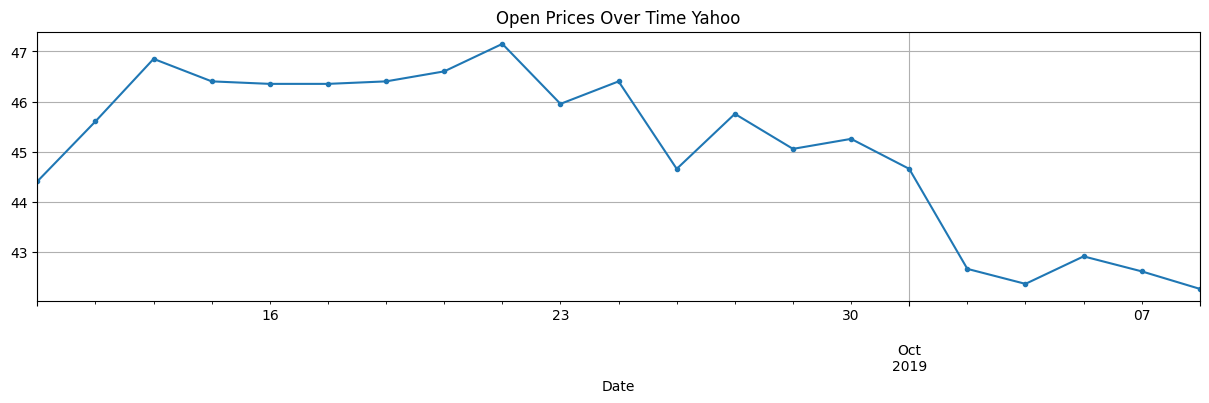

In [32]:
df_yahoo['Open'].plot(grid=True, marker=".", figsize=(15,3.5), title="Open Prices Over Time Yahoo")

In [33]:
df_stooq.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [27]:
df_naver.dtypes

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object

In [28]:
df_naver['Open'] = pd.to_numeric(df_naver['Open'], errors='coerce')
df_naver['High'] = pd.to_numeric(df_naver['High'], errors='coerce')
df_naver['Low'] = pd.to_numeric(df_naver['Low'], errors='coerce')
df_naver['Close'] = pd.to_numeric(df_naver['Close'], errors='coerce')
df_naver['Volume'] = pd.to_numeric(df_naver['Volume'], errors='coerce')

<Axes: title={'center': 'Open Prices Over Time Naver'}, xlabel='Date'>

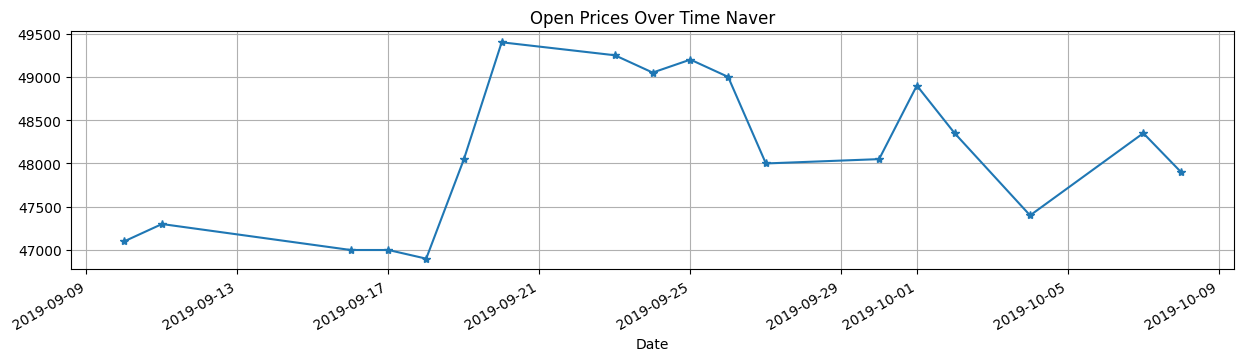

In [31]:
df_naver['Open'].plot(grid=True, marker="*", figsize=(15,3.5), title="Open Prices Over Time Naver")

In [34]:
df_stooq['Open'] = pd.to_numeric(df_stooq['Open'], errors='coerce')
df_stooq['High'] = pd.to_numeric(df_stooq['High'], errors='coerce')
df_stooq['Low'] = pd.to_numeric(df_stooq['Low'], errors='coerce')
df_stooq['Close'] = pd.to_numeric(df_stooq['Close'], errors='coerce')
df_stooq['Volume'] = pd.to_numeric(df_stooq['Volume'], errors='coerce')

<Axes: title={'center': 'Open Prices Over Time Stooq'}, xlabel='Date'>

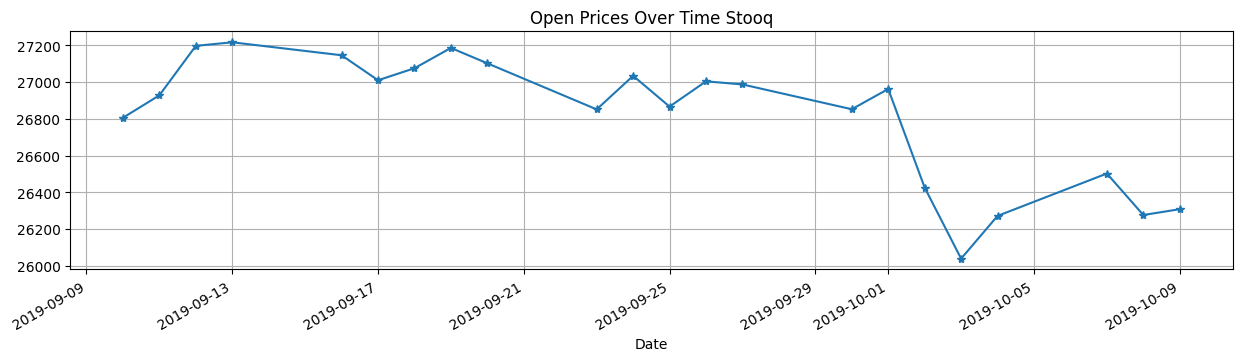

In [39]:
df_stooq['Open'].plot(grid=True, marker="*", figsize=(15,3.5), title="Open Prices Over Time Stooq")

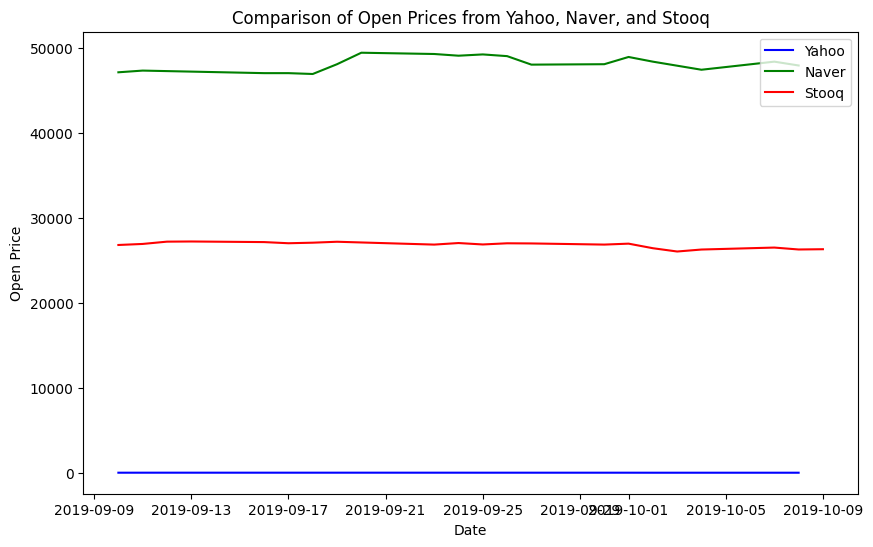

In [40]:
# Plot the 'Open' columns of each DataFrame on the same graph
plt.figure(figsize=(10, 6))

plt.plot(df_yahoo.index, df_yahoo['Open'], label='Yahoo', color='blue')
plt.plot(df_naver.index, df_naver['Open'], label='Naver', color='green')
plt.plot(df_stooq.index, df_stooq['Open'], label='Stooq', color='red')

# Adding title and labels
plt.title('Comparison of Open Prices from Yahoo, Naver, and Stooq')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()

# Show the plot
plt.show()


In [45]:
#Here, I define important prices as key support/resistance levels, high volatility regions, and high volume areas.
def identify_important_price_yahoo(df, start_date, end_date):
    #df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    high = df_yahoo['High'].max()
    low = df_yahoo['Low'].min()
    mean_price = df_yahoo[['Open', 'Close']].mean().mean()
    
    volatility = high - low
    
    total_volume = df_yahoo['Volume'].sum()
    volume_mean = df_yahoo['Volume'].mean()
    
    important_price_data = {
        'highest_price': high,
        'lowest_price': low,
        'mean_price': mean_price,
        'volatility': volatility,
        'total_volume': total_volume,
        'average_volume': volume_mean
    }
    
    return important_price_data

important_price_info = identify_important_price_yahoo(df_yahoo, '2019-09-10', '2019-10-09')
important_price_info


{'highest_price': np.float64(47.548648834228516),
 'lowest_price': np.float64(41.11911392211914),
 'mean_price': np.float64(45.0542060307094),
 'volatility': np.float64(6.429534912109375),
 'total_volume': np.int64(198083060),
 'average_volume': np.float64(9432526.666666666)}

In [46]:
def identify_important_price_naver(df, start_date, end_date):
    #df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    high = df_naver['High'].max()
    low = df_naver['Low'].min()
    mean_price = df_naver[['Open', 'Close']].mean().mean()
    
    volatility = high - low
    
    total_volume = df_naver['Volume'].sum()
    volume_mean = df_naver['Volume'].mean()
    
    important_price_data = {
        'highest_price': high,
        'lowest_price': low,
        'mean_price': mean_price,
        'volatility': volatility,
        'total_volume': total_volume,
        'average_volume': volume_mean
    }
    
    return important_price_data

important_price_info = identify_important_price_naver(df_yahoo, '2019-09-10', '2019-10-09')
important_price_info

{'highest_price': np.int64(49650),
 'lowest_price': np.int64(46400),
 'mean_price': np.float64(48218.055555555555),
 'volatility': np.int64(3250),
 'total_volume': np.int64(186139665),
 'average_volume': np.float64(10341092.5)}

In [47]:
def identify_important_price_stooq(df, start_date, end_date):
    #df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    high = df_stooq['High'].max()
    low = df_stooq['Low'].min()
    mean_price = df_stooq[['Open', 'Close']].mean().mean()
    
    volatility = high - low
    
    total_volume = df_stooq['Volume'].sum()
    volume_mean = df_stooq['Volume'].mean()
    
    important_price_data = {
        'highest_price': high,
        'lowest_price': low,
        'mean_price': mean_price,
        'volatility': volatility,
        'total_volume': total_volume,
        'average_volume': volume_mean
    }
    
    return important_price_data

important_price_info = identify_important_price_stooq(df_yahoo, '2019-09-10', '2019-10-09')
important_price_info

{'highest_price': np.float64(27306.73),
 'lowest_price': np.float64(25743.46),
 'mean_price': np.float64(26809.86431818182),
 'volatility': np.float64(1563.2700000000004),
 'total_volume': np.int64(5542697586),
 'average_volume': np.float64(251940799.36363637)}

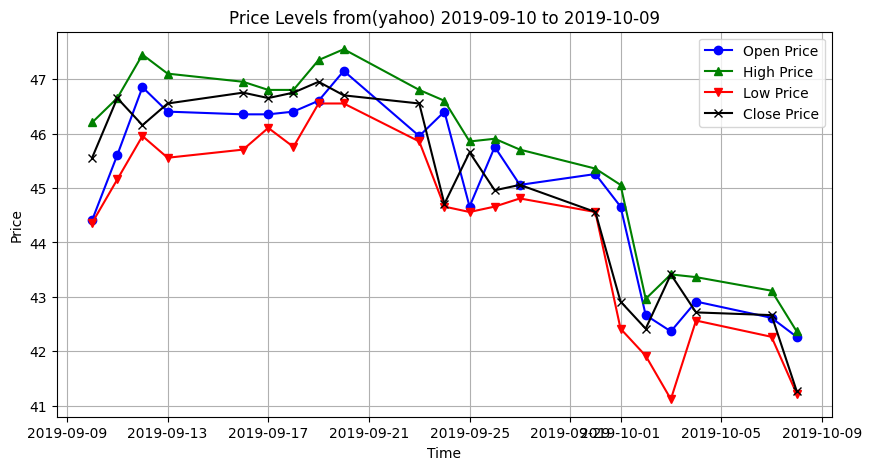

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1000x500 with 0 Axes>

In [53]:
def plot_prices_yahoo(df, start_date, end_date):
    #df_filtered = df[(df['ts_event'] >= start_date) & (df['ts_event'] <= end_date)]
    
    # Plot open prices over time
    plt.figure(figsize=(10, 5))
    plt.plot(df_yahoo['Open'], marker='o', label='Open Price', color='blue')
    plt.plot(df_yahoo['High'], marker='^', label='High Price', color='green')
    plt.plot(df_yahoo['Low'], marker='v', label='Low Price', color='red')
    plt.plot(df_yahoo['Close'], marker='x', label='Close Price', color='black')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Price Levels from(yahoo) {} to {}'.format(start_date, end_date))
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_volume(df, start_date, end_date):
    #df_filtered = df[(df['ts_event'] >= start_date) & (df['ts_event'] <= end_date)]
    
    plt.figure(figsize=(10, 5))
    plt.bar(df_yahoo['Volume'], color='purple', alpha=0.7)
    plt.xlabel('Time')
    plt.ylabel('Volume')
    plt.title('Volume Traded from {} to {}'.format(start_date, end_date))
    plt.grid(True)
    plt.show()

plot_prices_yahoo(df_yahoo, '2019-09-10', '2019-10-09')
plot_volume(df_yahoo, '2019-09-10', '2019-10-09')

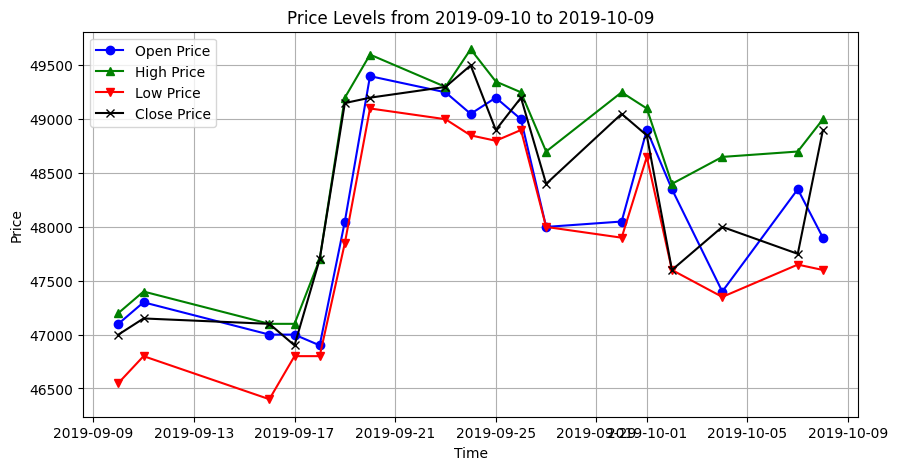

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1000x500 with 0 Axes>

In [52]:
def plot_prices_naver(df, start_date, end_date):
    #df_filtered = df[(df['ts_event'] >= start_date) & (df['ts_event'] <= end_date)]
    
    # Plot open prices over time
    plt.figure(figsize=(10, 5))
    plt.plot(df_naver['Open'], marker='o', label='Open Price', color='blue')
    plt.plot(df_naver['High'], marker='^', label='High Price', color='green')
    plt.plot(df_naver['Low'], marker='v', label='Low Price', color='red')
    plt.plot(df_naver['Close'], marker='x', label='Close Price', color='black')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Price Levels from(naver) {} to {}'.format(start_date, end_date))
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_volume(df, start_date, end_date):
    #df_filtered = df[(df['ts_event'] >= start_date) & (df['ts_event'] <= end_date)]
    
    plt.figure(figsize=(10, 5))
    plt.bar(df_yahoo['Volume'], color='purple', alpha=0.7)
    plt.xlabel('Time')
    plt.ylabel('Volume')
    plt.title('Volume Traded from {} to {}'.format(start_date, end_date))
    plt.grid(True)
    plt.show()

plot_prices_naver(df_yahoo, '2019-09-10', '2019-10-09')
plot_volume(df_naver, '2019-09-10', '2019-10-09')

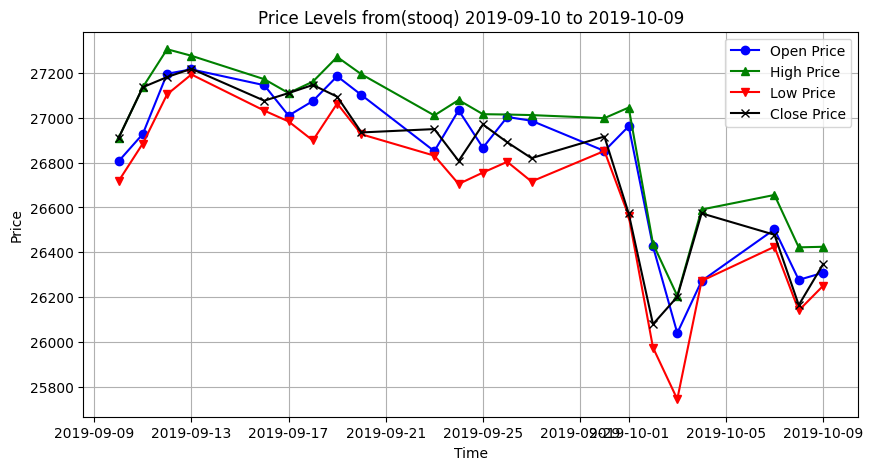

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1000x500 with 0 Axes>

In [54]:
def plot_prices_stooq(df, start_date, end_date):
    #df_filtered = df[(df['ts_event'] >= start_date) & (df['ts_event'] <= end_date)]
    
    # Plot open prices over time
    plt.figure(figsize=(10, 5))
    plt.plot(df_stooq['Open'], marker='o', label='Open Price', color='blue')
    plt.plot(df_stooq['High'], marker='^', label='High Price', color='green')
    plt.plot(df_stooq['Low'], marker='v', label='Low Price', color='red')
    plt.plot(df_stooq['Close'], marker='x', label='Close Price', color='black')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Price Levels from(stooq) {} to {}'.format(start_date, end_date))
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_volume(df, start_date, end_date):
    #df_filtered = df[(df['ts_event'] >= start_date) & (df['ts_event'] <= end_date)]
    
    plt.figure(figsize=(10, 5))
    plt.bar(df_stooq['Volume'], color='purple', alpha=0.7)
    plt.xlabel('Time')
    plt.ylabel('Volume')
    plt.title('Volume Traded from {} to {}'.format(start_date, end_date))
    plt.grid(True)
    plt.show()

plot_prices_stooq(df_stooq, '2019-09-10', '2019-10-09')
plot_volume(df_stooq, '2019-09-10', '2019-10-09')